In [1]:
import random as r
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("dark")

In [2]:
num_states = 25
sns.set_palette(sns.color_palette("Set2"))

In [3]:
def relax(initial_state, visit_counts, mu=1):
    visit_counts = visit_counts.copy()
    state = r.randint(0,initial_state-1)
    visit_counts[state] += 1/mu
    
    if state > 0:
        m = int(np.floor(mu))
        fr = mu - m

        for _ in range(m):  # break into m branches
            visit_counts = relax(state, visit_counts, mu=mu)

        p = np.random.random() # fractional part of mu
        if p < fr:
            visit_counts = relax(state, visit_counts, mu=mu)
        
    
    return visit_counts

In [4]:
def simulate(num_states, num_relaxations, mu=1):
    visit_counts = [0 for _ in range(num_states)]
    
    for _ in range(num_relaxations):
        visit_counts = relax(num_states, visit_counts, mu=mu)
            
    return visit_counts

In [5]:
visits = simulate(num_states, 10000, mu=1.5)
total_visits = np.sum(visits)

visits = list(map(lambda x: x/total_visits, visits))
visits

[0.40392378915148786,
 0.16093617288996057,
 0.09247433598623396,
 0.06276804345317007,
 0.043904075833350965,
 0.03450879234955001,
 0.02854236790503677,
 0.02200970985770419,
 0.018423563706520017,
 0.01574968280432135,
 0.014386527834573212,
 0.012226451497895393,
 0.011660217895076935,
 0.010076860968677175,
 0.009091195067474673,
 0.008608847924333024,
 0.007203749724746409,
 0.00694160453825636,
 0.006260027053382233,
 0.006197112208624621,
 0.00592448121467497,
 0.005106588232826018,
 0.004351610095734676,
 0.004393553325573084,
 0.004330638480815472]

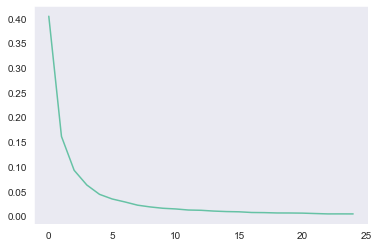

In [6]:
sns.lineplot(range(num_states), visits)

In [7]:
exponents = []

for i in range(0, 4):
    visits = simulate(num_states, 10000, mu=0.5*(2**i)) 
    total_visits = np.sum(visits)

    visits = list(map(lambda x: x/total_visits, visits))
    
    exponents.append(visits)    

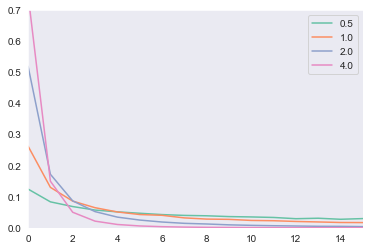

In [8]:
fig, ax = plt.subplots((1))
ax.set_ylim(0, 0.7)
ax.set_xlim(0, 15)

for i, exp in enumerate(exponents):
    mu = 0.5*(2**i)
    l = "%f" %(mu)
    ax = sns.lineplot(range(num_states), exp, label=l[:3])
    
ax.legend()